In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# get the df
df = pd.read_csv('data/aita_dataset/aita_clean.csv')

# reduce it
reduced_df = df[['title', 'body', 'is_asshole']]

/home/kyuyeon/miniconda3/envs/ml_proj_lex/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
reduced_df.head(3)

,title,body,is_asshole
0,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,1
1,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",1
2,I told a goth girl she looked like a clown.,I was four.,0


In [3]:
df.size

878652

In [4]:
# use smaller subset
df = df.sample(n=1000, random_state=42)

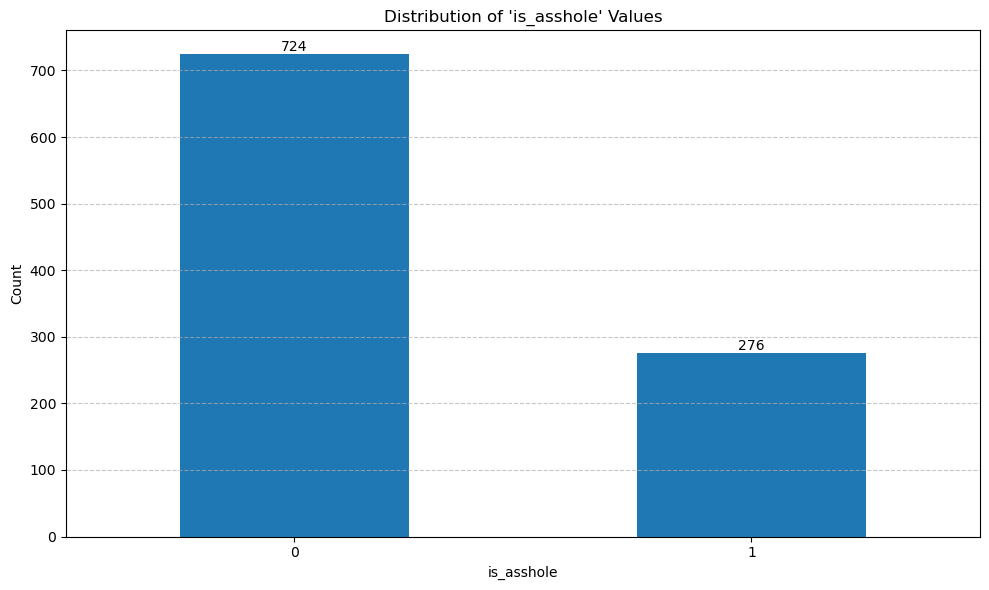

In [ ]:
# want to see distributino of yta vs nta
asshole_counts = df['is_asshole'].value_counts()
# bar chart time
plt.figure(figsize=(10, 6))
asshole_counts.plot(kind='bar')

# add title / labels
plt.title("Distribution of 'is_asshole' Values")
plt.xlabel("is_asshole")
plt.ylabel("Count")

# put the values onto so we can see
for i, v in enumerate(asshole_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [6]:
import os

filename = 'title_embeddings_subset1000_rand42.npy'

if os.path.exists(filename):
    print('Loading precomputed embeddings!')
    title_embeddings = np.load(filename)

else:
    model = SentenceTransformer('all-MiniLM-L6-v2')
    title_embeddings = model.encode(df['title'].tolist())
    np.save(filename, title_embeddings)

Loading precomputed embeddings!


In [ ]:
# color based on verdict
is_asshole_colors = ['red' if x else 'green' for x in df['is_asshole']]

In [8]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(title_embeddings)

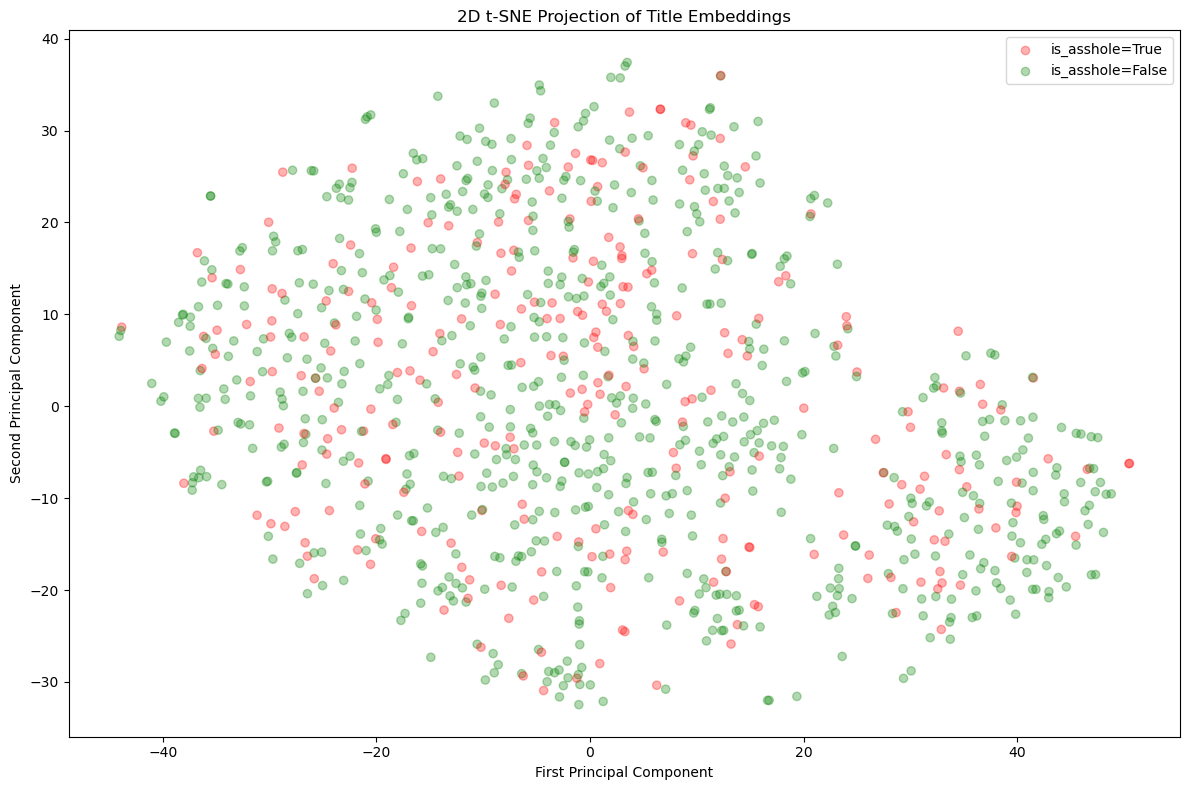

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c=is_asshole_colors, alpha=0.3)
plt.title("2D t-SNE Projection of Title Embeddings")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.scatter([], [], c='red', alpha=0.3, label='is_asshole=True')
plt.scatter([], [], c='green', alpha=0.3, label='is_asshole=False')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# let's see pca
pca = PCA(n_components=3)
reduced_embeddings_pca = pca.fit_transform(title_embeddings)

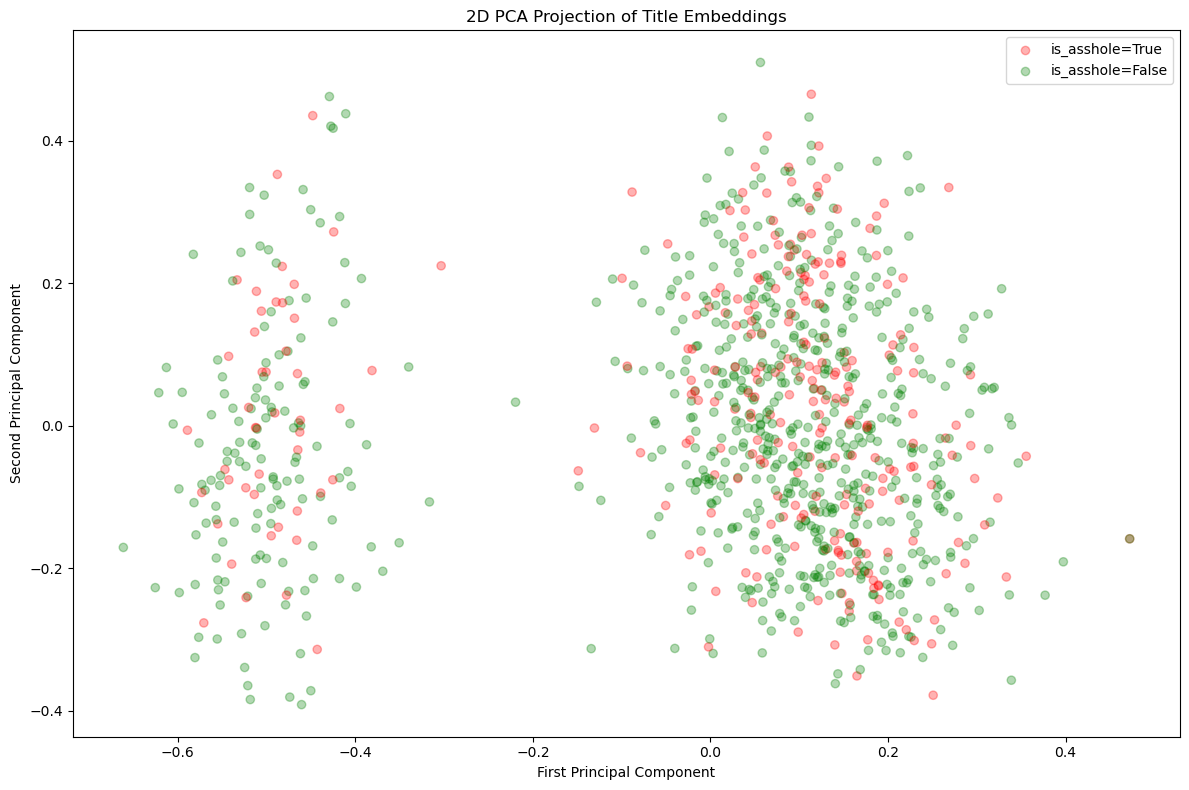

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(reduced_embeddings_pca[:,0], reduced_embeddings_pca[:, 1],
            c=is_asshole_colors, alpha=0.3 )
plt.title("2D PCA Projection of Title Embeddings")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.scatter([], [], c='red', alpha=0.3,label='is_asshole=True')
plt.scatter([], [], c='green', alpha=0.3, label='is_asshole=False')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# let's see tsne for 3 dim
tsne = TSNE(n_components=3,random_state=42)
reduced_embeddings_tsne3 =tsne.fit_transform(title_embeddings)

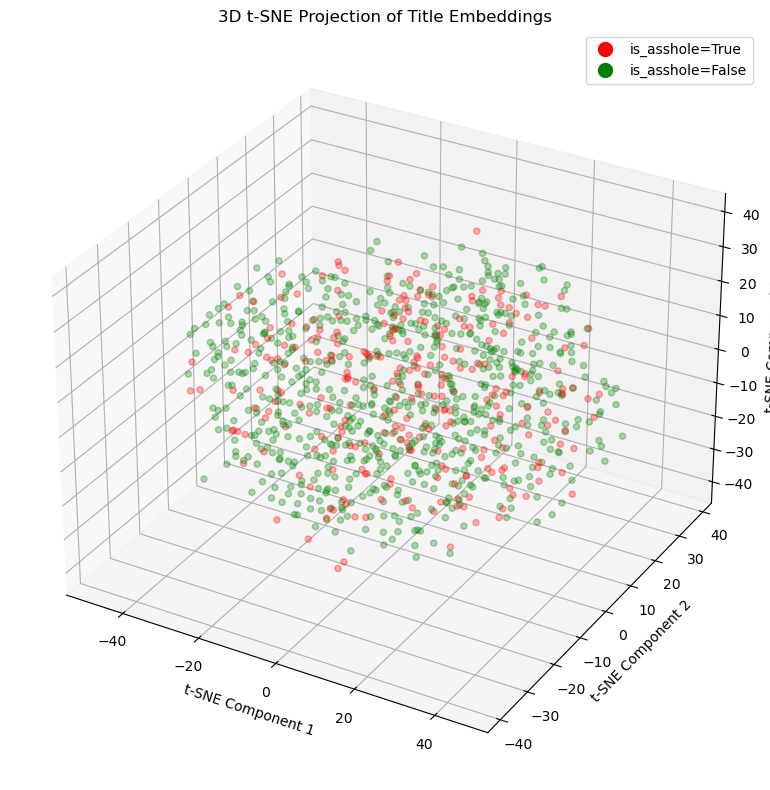

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_embeddings_tsne3[:, 0], reduced_embeddings_tsne3[:, 1],reduced_embeddings_tsne3[:,2],
        c=is_asshole_colors, alpha=0.3)
red_patch = plt.Line2D([], [],color='red', marker='o', markersize=10, linestyle='None', label='is_asshole=True')
green_patch = plt.Line2D([],[], color='green', marker='o', markersize=10, linestyle='None', label='is_asshole=False')
ax.legend(handles=[red_patch, green_patch])
# tsne time
ax.set_title('3D t-SNE Projection of Title Embeddings')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.tight_layout()
plt.show()

In [ ]:
# let's see how pca does
pca = PCA(n_components=3)
reduced_embeddings_pca3 = pca.fit_transform(title_embeddings)

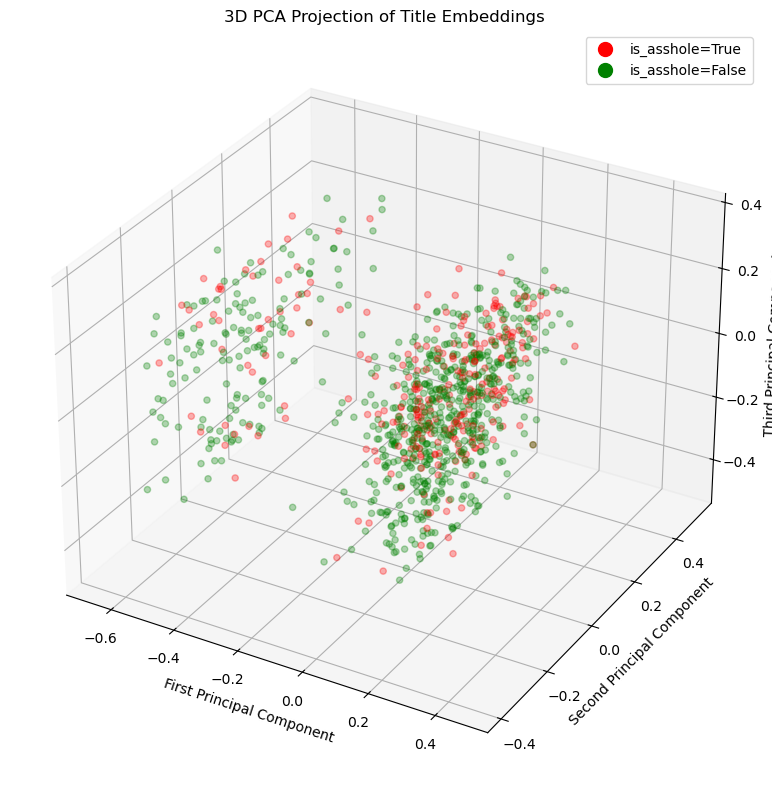

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111,projection='3d')
is_asshole_colors = ['red' if x else 'green' for x in df['is_asshole']]

scatter = ax.scatter(reduced_embeddings_pca3[:,0], reduced_embeddings_pca3[:, 1], reduced_embeddings_pca3[:,2],
                     c=is_asshole_colors, alpha=0.3)

ax.set_title("3D PCA Projection of Title Embeddings")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
red_patch = plt.Line2D([], [], color='red', marker='o', markersize=10, linestyle='None', label='is_asshole=True')
green_patch = plt.Line2D([], [], color='green', marker='o', markersize=10, linestyle='None', label='is_asshole=False')
ax.legend(handles=[red_patch, green_patch])
plt.tight_layout()
plt.show()

In [16]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(title_embeddings)

GaussianMixture(n_components=3, random_state=42)

In [ ]:
# gmm time
labels = gm.predict(title_embeddings)
probs = gm.predict_proba(title_embeddings)
prob_max = np.max(probs, axis=1)

/tmp/ipykernel_42022/2717769754.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


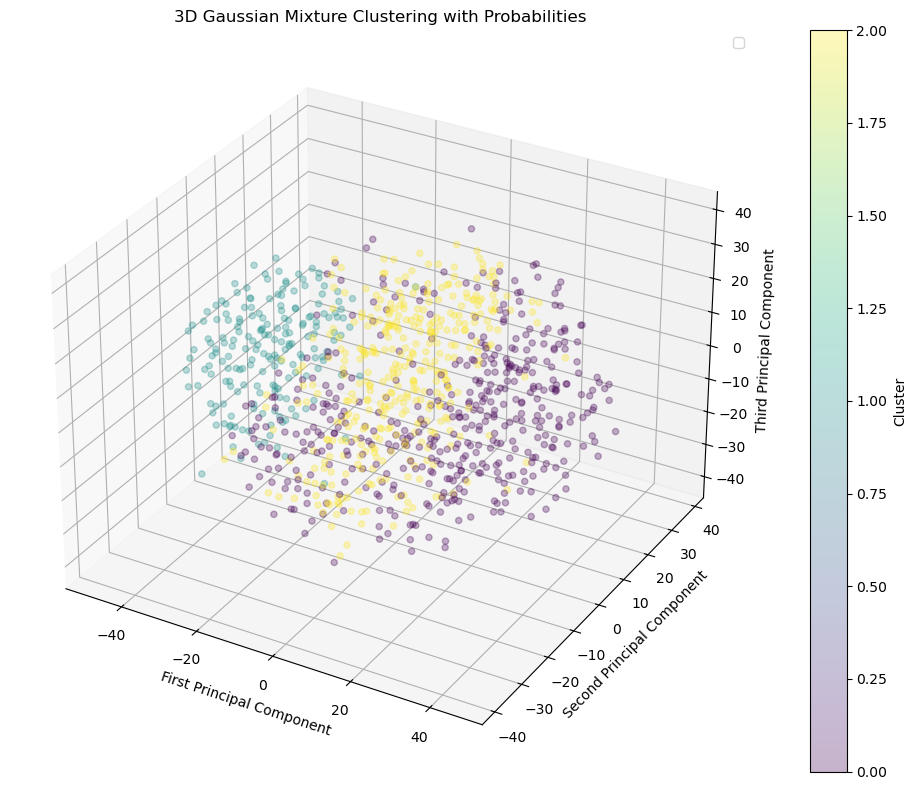

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111,projection='3d')

# scatter, but color based on verdict
scatter = ax.scatter(reduced_embeddings_tsne3[:, 0], reduced_embeddings_tsne3[:, 1], reduced_embeddings_tsne3[:,2],
                     c=labels, alpha=0.3)

colorbar = fig.colorbar(scatter, ax=ax, label='Cluster')
ax.set_title('3D Gaussian Mixture Clustering with Probabilities')
ax.set_xlabel('First Principal Component' )
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()

plt.tight_layout()
plt.show()

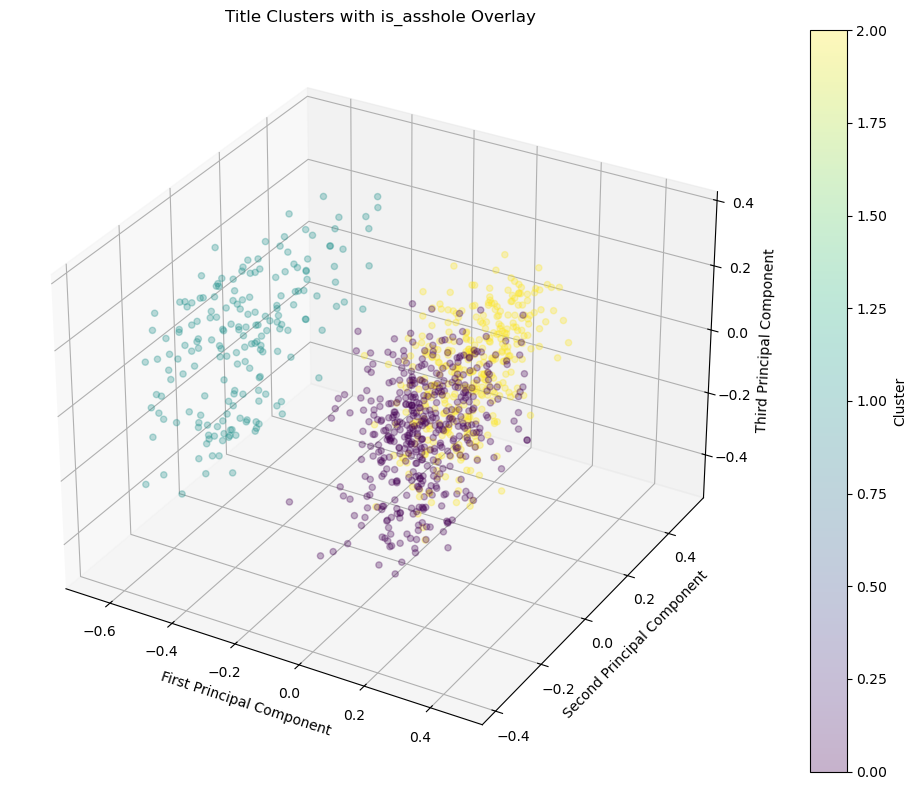

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_embeddings_pca3[:, 0], reduced_embeddings_pca3[:, 1], reduced_embeddings_pca3[:, 2],
        c=labels, alpha=0.3 )

# title / labels
ax.set_title("Title Clusters with is_asshole Overlay")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
colorbar = fig.colorbar(scatter, ax=ax, label='Cluster')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
filename = 'body_embeddings_subset1000_rand42.npy'
if os.path.exists(filename):
    print('Loading precomputed embeddings!')
    body_embeddings = np.load(filename)
else:
    model = SentenceTransformer('all-MiniLM-L6-v2' )
    body_embeddings = model.encode(df['body'].tolist())
    np.save(filename, body_embeddings)

Loading precomputed embeddings!


In [ ]:
# try againt with embeddings
pca = PCA(n_components=3)
reduced_embeddings_pca = pca.fit_transform(body_embeddings)

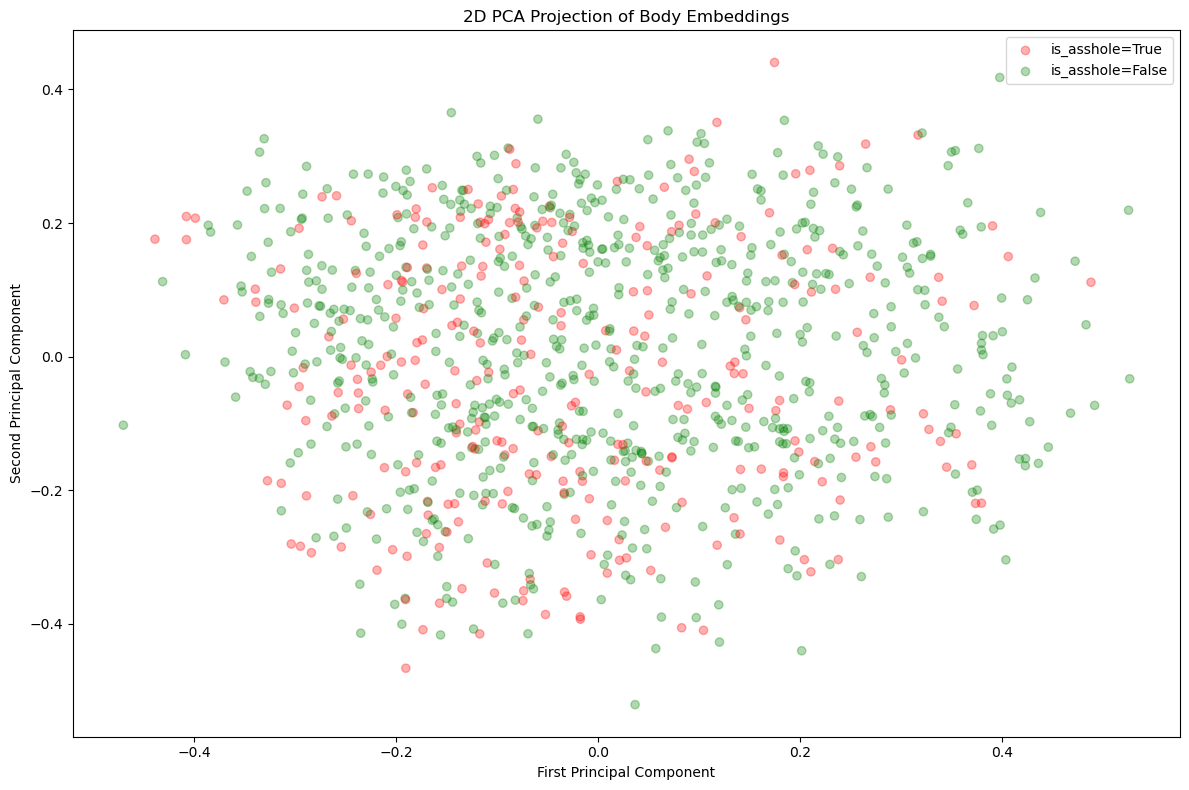

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:,1],
            c=is_asshole_colors, alpha=0.3)

plt.title("2D PCA Projection of Body Embeddings" )
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.scatter([], [], c='red', alpha=0.3,label='is_asshole=True')
plt.scatter([], [], c='green', alpha=0.3, label='is_asshole=False')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
gm_title_10 = GaussianMixture(n_components=10,random_state=42)
gm_title_10.fit(title_embeddings)

GaussianMixture(n_components=10, random_state=42)

In [26]:
labels_t10 = gm_title_10.predict(title_embeddings)
probs_t10 = gm_title_10.predict_proba(title_embeddings)

In [ ]:
yta = [0] * 10
nta = [0] * 10

for i in range(1000):
    if df['is_asshole'].iloc[i]:
        yta[labels_t10[i]] += 1
    else:
        nta[labels_t10[i]] += 1
yta = np.array(yta)
nta = np.array(nta)

array = yta / (yta + nta)

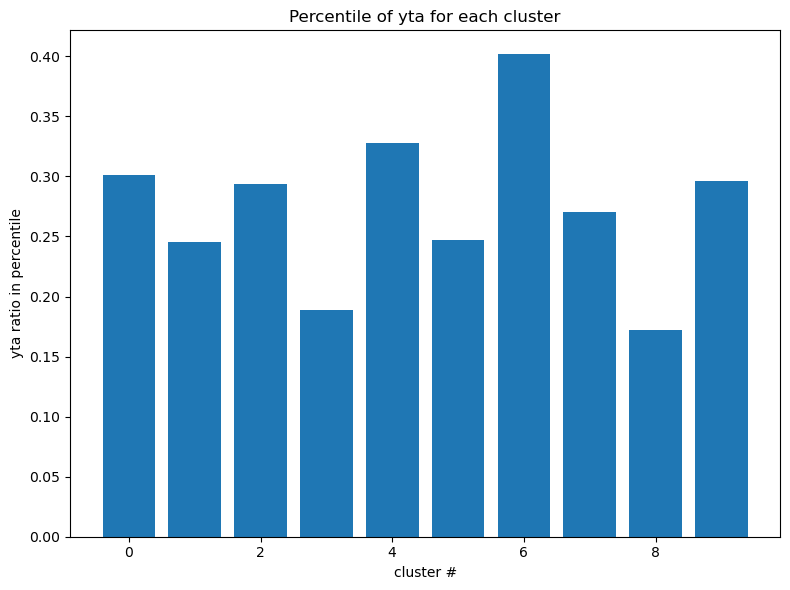

In [57]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(array)), array)

plt.xlabel('cluster #')
plt.ylabel('yta ratio in percentile')
plt.title('Percentile of yta for each cluster')

plt.tight_layout()
plt.show()

In [27]:
gm_body_10 = GaussianMixture(n_components=10, random_state=42)
gm_body_10.fit(body_embeddings)

GaussianMixture(n_components=10, random_state=42)

In [28]:
labels_b10 = gm_body_10.predict(body_embeddings)
probs_b10 = gm_body_10.predict_proba(body_embeddings)

In [58]:
yta = [0] * 10
nta = [0] * 10

for i in range(1000):
    if df['is_asshole'].iloc[i]:
        yta[labels_b10[i]] += 1
    else:
        nta[labels_b10[i]] += 1

yta = np.array(yta)
nta = np.array(nta)

array = yta / (yta + nta)

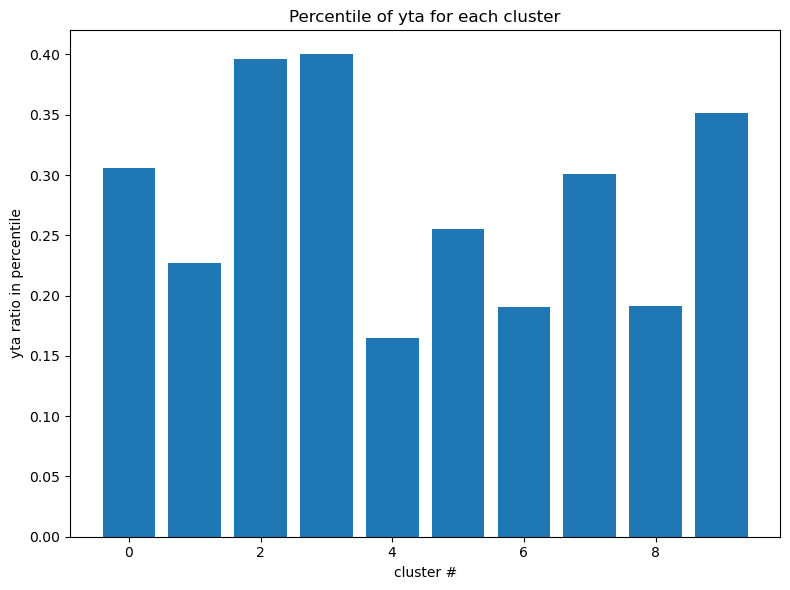

In [59]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(array)), array)

plt.xlabel('cluster #')
plt.ylabel('yta ratio in percentile')
plt.title('Percentile of yta for each cluster')

plt.tight_layout()
plt.show()